# Team 02
# 5.3 Modeling


We display the libraries that we will use for the modeling.

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
import math
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn import  linear_model
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
plt.style.use("ggplot")

In [57]:
df = pd.read_csv("clean.csv",index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9582 entries, 0 to 9581
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_acceptance_rate    9582 non-null   float64
 1   host_is_superhost       9582 non-null   int64  
 2   host_identity_verified  9582 non-null   int64  
 3   latitude                9582 non-null   float64
 4   bathrooms               9582 non-null   float64
 5   price                   9582 non-null   float64
 6   has_availability        9582 non-null   int64  
 7   instant_bookable        9582 non-null   int64  
 8   Private room            9582 non-null   int64  
 9   within a day            9582 non-null   int64  
 10  within a few hours      9582 non-null   int64  
 11  kitchen                 9582 non-null   int64  
 12  Breakfast               9582 non-null   int64  
 13  Nespresso machine       9582 non-null   int64  
 14  TV                      9582 non-null   

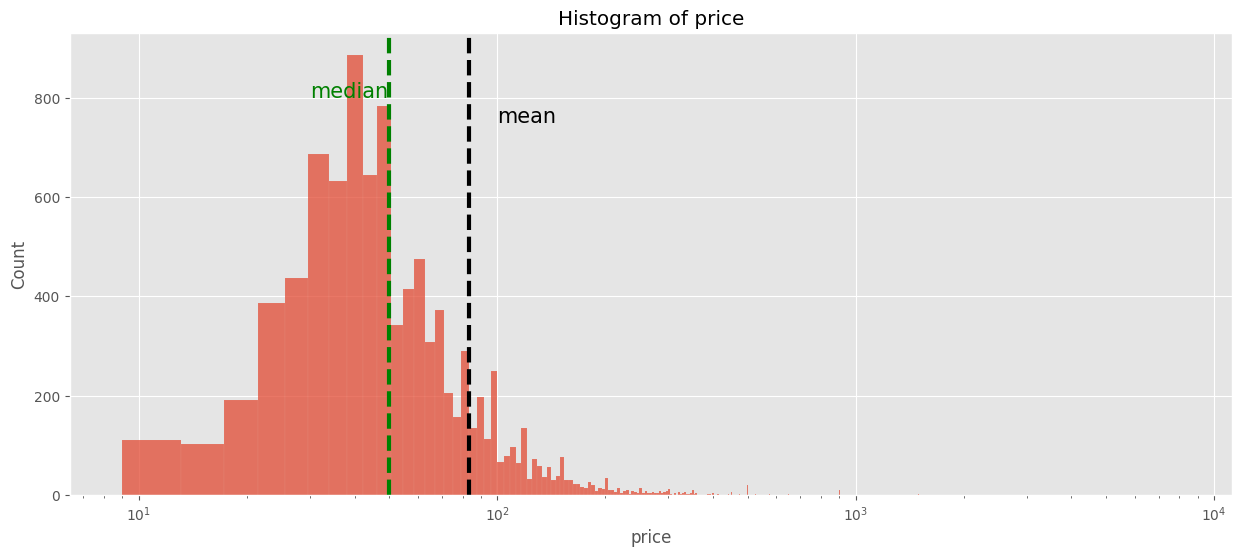

In [ ]:
#histogram of price
f, ax = plt.subplots(1,1,figsize=(15,6))
ax = sns.histplot(df.price)
plt.xscale("log")
plt.title("Histogram of price")
plt.axvline(df.price.mean(), color='k', linestyle='dashed', linewidth=3)
plt.axvline(df.price.median(), color='green', linestyle='dashed', linewidth=3)
ax.annotate('mean', xy=(100,750),size=15)
ax.annotate('median', xy=(30,800),size=15,color="green")
plt.show()


# Cutting off the dataset with prices less than 500

In [86]:
df2 = df[df["price"]<500]

In [ ]:
#Fill outliers in log_min_nights, log_max_nights with median
df2.loc[df2.log_min_nights>2,"log_min_nights"] = df2.log_min_nights.median()
df2.loc[df2.log_max_nights>10,"log_max_nights"] = df2.log_max_nights.median()
df2.loc[df2.log_max_nights<0.5,"log_max_nights"] = df2.log_max_nights.median()

In [87]:
#p-values significance for features
x = df2.drop("price",axis=1)
y=df2["price"]
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     228.9
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:40:05   Log-Likelihood:                -49266.
No. Observations:                9499   AIC:                         9.858e+04
Df Residuals:                    9477   BIC:                         9.873e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.94

In [88]:
#drop non significant variables(a=0.05)
df2.drop(["has_availability","Private room","within a few hours","security_cameras"],axis=1,inplace=True)

# Regression 

## Spliting the data set into train (70%) and test (30%)

In [67]:
#spliting the data
x = df2.drop("price",axis=1)
y=df2["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=13)

## Standardization

In [68]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

##Linear Regression

In [70]:
model = LinearRegression(fit_intercept = True)
model.fit(x_train, y_train)
preds = model.predict(x_test)
print("Train Accuracy: ",model.score(x_train, y_train))
print("Test Accuracy: ",model.score(x_test, y_test))

mae = mean_absolute_error(y_test, preds)
mape = mean_absolute_percentage_error(y_test, preds)
r2  = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)
print('Mean Absolute Error (MAE): %.3f' % mae)
print('Mean Absolute Percentage Error (MAPE): %.5f' % mape)
print('Coefficient of Determination (R2): %.5f' % r2)
print('Mean Squared Error (MSE): %.5f' % mse)

Train Accuracy:  0.3373234730545379
Test Accuracy:  0.3301566903928347
Mean Absolute Error (MAE): 27.240
Mean Absolute Percentage Error (MAPE): 0.48844
Coefficient of Determination (R2): 0.33016
Mean Squared Error (MSE): 1917.90326


##Cross Validation - Linear Regression

In [71]:
#k=5 cross validation Linear Regression
model = cross_val_score(estimator=regressor,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [72]:
print("Linear Regression Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-model.mean()))
print("Std: {}".format(model.std()))

Linear Regression Cross Validation
Mean Absolute Error (MAE): 24.641163235402278
Std: 0.7647378981492069


##Ridge Regression

In [73]:
ridge  = Ridge(fit_intercept = True)
# fitting the model
ridge.fit(x_train, y_train)
# predictions
preds = ridge.predict(x_test)

print("Train Accuracy:",ridge.score(x_train, y_train))
print("Test Accuracy:",ridge.score(x_test, y_test))

# evaluate predictions
mae = mean_absolute_error(y_test, preds)
mape = mean_absolute_percentage_error(y_test, preds)
r2  = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)

print('Mean Absolute Error (MAE): %.5f' % mae)
print('Μean Absolute Percentage Error (MAPE): %.5f' % mape)
print('Coefficient of Determination (R2): %.5f' % r2)
print('Mean Squared Error (MSE): %.5f' % mse)

Train Accuracy: 0.3373234682954648
Test Accuracy: 0.33015596521326185
Mean Absolute Error (MAE): 27.23963
Μean Absolute Percentage Error (MAPE): 0.48843
Coefficient of Determination (R2): 0.33016
Mean Squared Error (MSE): 1917.90534


##Cross Validation - Ridge Regression

In [74]:
#k=5 cross validation Ridge Regression
ridge = cross_val_score(estimator=regressor,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [75]:
print("Ridge Regression Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-ridge.mean()))
print("Std: {}".format(ridge.std()))

Ridge Regression Cross Validation
Mean Absolute Error (MAE): 24.62800449204275
Std: 0.7762663244379091


##XGBRegressor

In [89]:
# Create instace
xgb_reg = XGBRegressor()
# Fit the model on training data
xgb_reg.fit(x_train, y_train)
# Predict
training_preds_xgb_reg = xgb_reg.predict(x_train)
# Validate
val_preds_xgb_reg = xgb_reg.predict(x_test)
# evaluate predictions
mae = mean_absolute_error(y_test, val_preds_xgb_reg)
mape = mean_absolute_percentage_error(y_test, preds)
r2  = r2_score(y_test, val_preds_xgb_reg)
mse = mean_squared_error(y_test, val_preds_xgb_reg)

print('Mean Absolute Error (MAE): %.5f' % mae)
print('Μean Absolute Percentage Error (MAPE): %.5f' % mape)
print('Coefficient of Determination (R2): %.5f' % r2)
print('Mean Squared Error (MSE): %.5f' % mse)

[14:40:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error (MAE): 24.49461
Μean Absolute Percentage Error (MAPE): 0.48843
Coefficient of Determination (R2): 0.41155
Mean Squared Error (MSE): 1684.84269


##Cross Validation - XGBRegressor

In [77]:
#k=5 cross validation XGBRegressor
xgb_reg = cross_val_score(estimator=regressor,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [78]:
print("XGBRegressor Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-xgb_reg.mean()))
print("Std: {}".format(xgb_reg.std()))

XGBRegressor Cross Validation
Mean Absolute Error (MAE): 24.608227792958694
Std: 0.7807069281411269


#Hyper Parameter Tuning

## Hyper Parameter Tuning - Desicion Tree Regressor

In [79]:
#time: approximately 10 minutes
parameters = {"criterion": ["squarred_error", "absolute_error"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
reg = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters)
reg.fit(x_train,y_train)
reg.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 356, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'squarred_error'



{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 40}

In [ ]:
#Best parameters for Desicion Tree Regressor
regressor = DecisionTreeRegressor(max_depth=8,criterion="absolute_error",
    max_leaf_nodes=100,min_samples_split=10,min_samples_leaf=20)
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test,pred)))
print("Mean Absolute Percentage Error (MAPE): {}".format(mean_absolute_percentage_error(y_test,pred)))
print("Coefficient of Determination (R2): {}".format(r2_score(y_test,pred)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test,pred)))

Mean Absolute Error (MAE): 24.973684210526315
Mean Absolute Percentage Error (MAPE): 0.3753674936367199
Coefficient of Determination (R2): 0.32274436718237454
Mean Squared Error (MSE): 1939.1263157894737


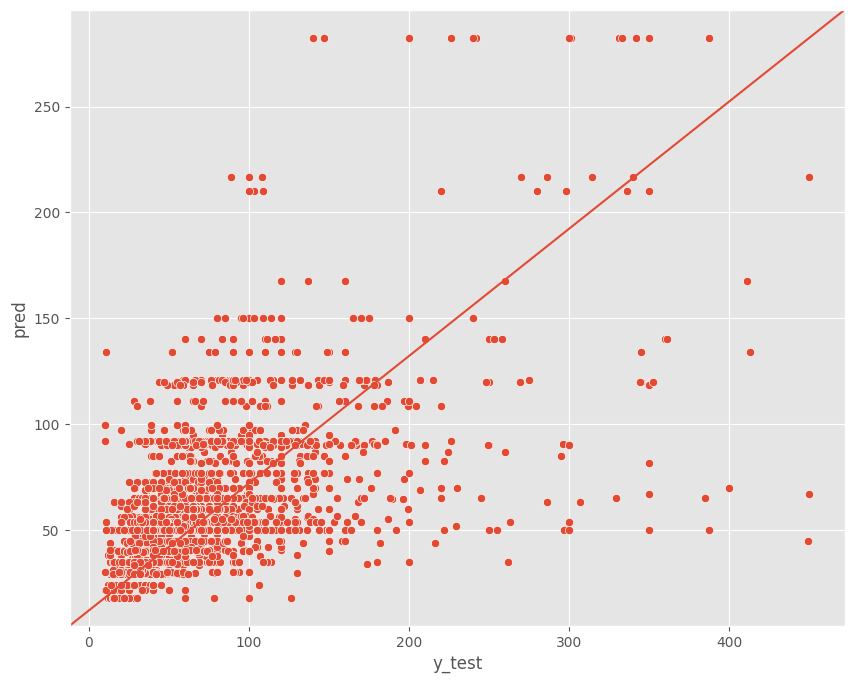

In [ ]:
#y_test with predicted y plot
dd = pd.DataFrame({"y_test":y_test,"pred":pred})
f, ax = plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x=dd.y_test,y=dd.pred)
ax.plot([0,1],[0,1], transform=ax.transAxes)
plt.show()

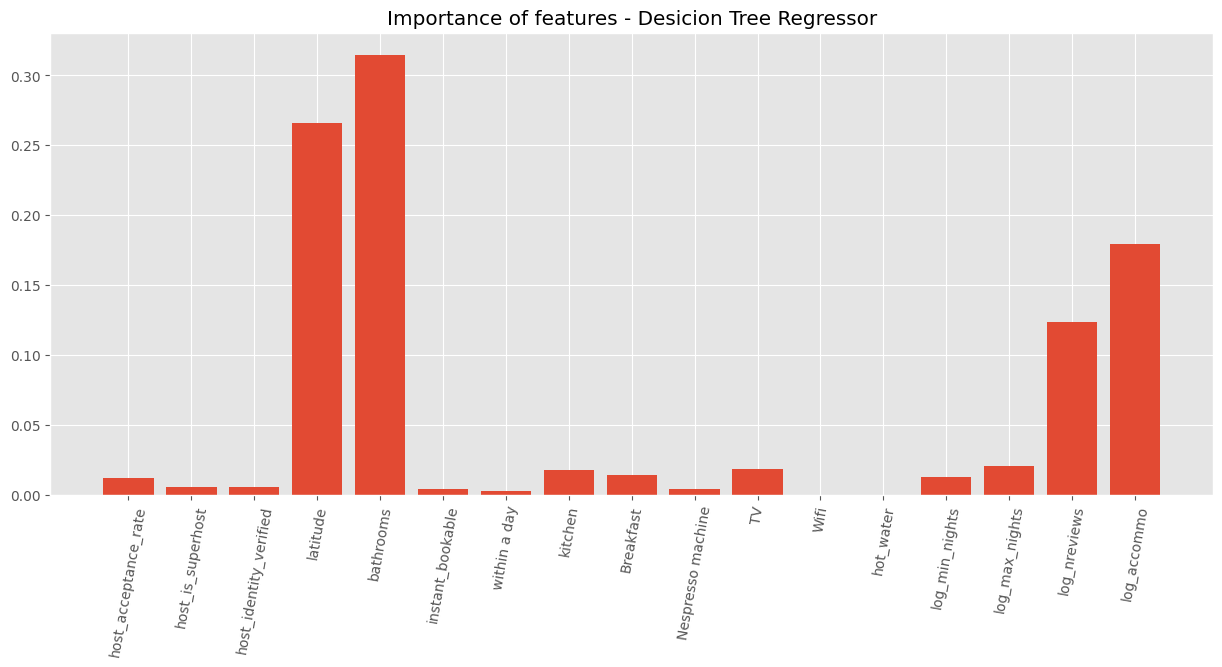

In [ ]:
d = pd.DataFrame({"feature":x.columns,
                  "importance":regressor.feature_importances_})
#Importance of features for Desicion Tree Regressor
f, ax = plt.subplots(1,1,figsize=(15,6))
ax = plt.bar(d.feature,d.importance)
plt.xticks(rotation=80)
plt.title("Importance of features - Desicion Tree Regressor")
plt.show()

## Cross Validation - Desicion Tree Regressor

In [ ]:
#k=5 cross validation Desicion Tree Regressor 
dtr = cross_val_score(estimator=regressor,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [ ]:
print("Desicion Tree Regressor Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-dtr.mean()))
print("Std: {}".format(dtr.std()))

Desicion Tree Regressor Cross Validation
Mean Absolute Error (MAE): 24.633269912931315
Std: 0.7978381087260812


## Hyper Parameter Tuning - SVM Regressor

In [ ]:
#time: approximately 22 minutes
#SVM regression Hyper paramter tuning
parameters = {'kernel': ('linear', 'rbf','poly'), 
              'C':[1.5, 10],
              'gamma': [1e-7, 1e-4],
              'epsilon':[0.1,0.2,0.5,0.3]}
grid = GridSearchCV(SVR(), param_grid = parameters)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1e-07, 'kernel': 'linear'}

In [ ]:
#best parameters for SVM Regressor
regressor = SVR(kernel = "linear",C=10,
                gamma=1e-07,epsilon=0.3) #predict
regressor.fit(x_train, y_train) 
pred = regressor.predict(x_test)
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test,pred)))
print("Mean Absolute Percentage Error (MAPE): {}".format(mean_absolute_percentage_error(y_test,pred)))
print("Coefficient of Determination (R2): {}".format(r2_score(y_test,pred)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test,pred)))

Mean Absolute Error (MAE): 25.961645876644507
Mean Absolute Percentage Error (MAPE): 0.40320969745353763
Coefficient of Determination (R2): 0.2706248888270655
Mean Squared Error (MSE): 2088.3554209406966


## Cross Validation - SVM Regressor

In [ ]:
#k=5 cross validation SVM Regressor
svm = cross_val_score(estimator=regressor,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [ ]:
print("SVM Regressor Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-svm.mean()))
print("Std: {}".format(svm.std()))

SVM Regressor Cross Validation
Mean Absolute Error (MAE): 25.40052779906006
Std: 0.7827170943747955


## XGBoost Regressor

In [90]:
 #run this, if the following code can not run
 try: 
     import xgboost 
 except ImportError: 
     pass 
 except: 
     print("xgboost is installed...but failed to load!") 
     pass 

In [92]:
xgb = xgboost.XGBRegressor(n_estimators=500, learning_rate=0.08, gamma=0, subsample=0.75,
    colsample_bytree=1, max_depth=7)
xgb.fit(x_train,y_train)
#calculate and print scores for the model for top 15 features
y_test_preds = xgb.predict(x_test)
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test,pred)))
print("Mean Absolute Percentage Error (MAPE): {}".format(mean_absolute_percentage_error(y_test,pred)))
print("Coefficient of Determination (R2): {}".format(r2_score(y_test,pred)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test,pred)))

[14:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error (MAE): 23.40744680386437
Mean Absolute Percentage Error (MAPE): 0.3870325851658614
Coefficient of Determination (R2): 0.45115740191622866
Mean Squared Error (MSE): 1571.4526001692175


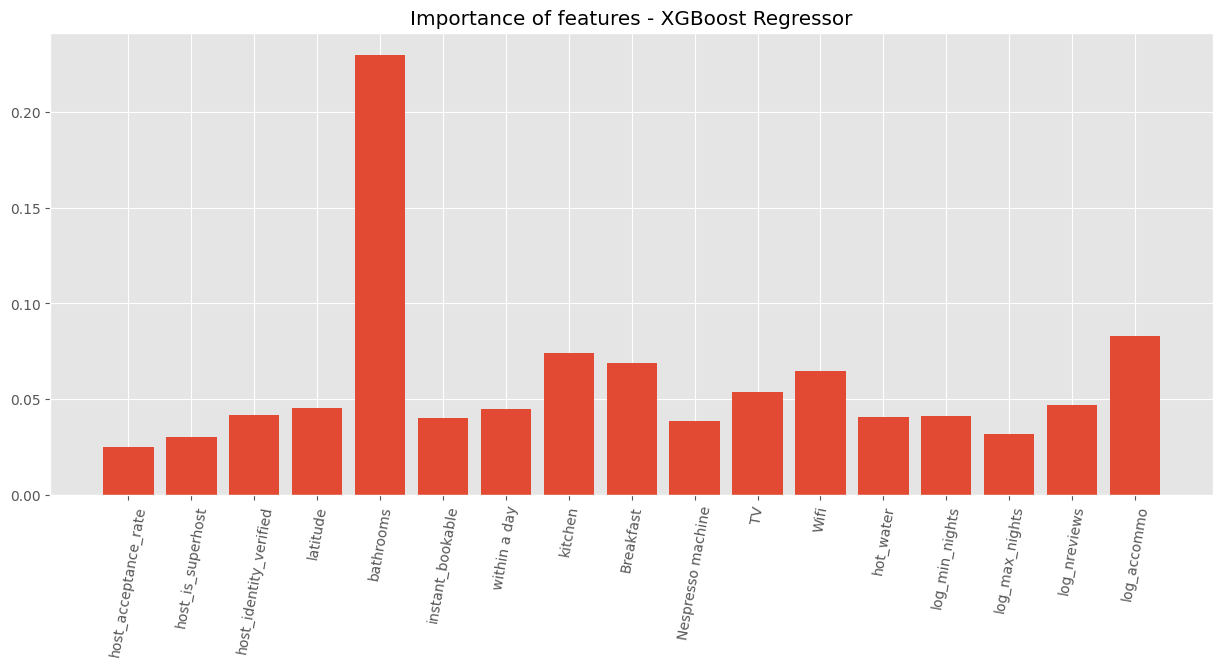

In [ ]:
dxgb = pd.DataFrame({"feature":x.columns,
                     "importance":xgb.feature_importances_})
#plot
f, ax = plt.subplots(1,1,figsize=(15,6))
ax = plt.bar(dxgb.feature,dxgb.importance)
plt.xticks(rotation=80)
plt.title("Importance of features - XGBoost Regressor")
plt.show()

## Cross Validation XGBoost Regressor

In [ ]:
xgr = cross_val_score(estimator=xgb,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [ ]:
print("XGBoost Regressor Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-xgr.mean()))
print("Std: {}".format(xgr.std()))

XGBoost Regressor Cross Validation
Mean Absolute Error (MAE): 24.394118740086913
Std: 0.36773538496263625


## Random Forest Regressor

In [ ]:
#Random Forest
rf = RandomForestRegressor(n_estimators = 1000)
# Train the model on training data
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test,predictions)))
print("Mean Absolute Percentage Error (MAPE): {}".format(mean_absolute_percentage_error(y_test,predictions)))
print("Coefficient of Determination (R2): {}".format(r2_score(y_test,predictions)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test,predictions)))

Mean Absolute Error (MAE): 24.22113886466165
Mean Absolute Percentage Error (MAPE): 0.4114898544346555
Coefficient of Determination (R2): 0.43703603683786585
Mean Squared Error (MSE): 1611.8850592163283


## Cross Validation - Random Forest Regressor

In [ ]:
#time: approximately 6 minutes
rfr = cross_val_score(estimator=rf,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [ ]:
print("Random Forest Regressor Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-rfr.mean()))
print("Std: {}".format(rfr.std()))

Random Forest Regressor Cross Validation
Mean Absolute Error (MAE): 24.200335074055666
Std: 0.6143683567736242


# Ensemble Methods for Regression

## Stacking method with final_estimator: Linear Regression

In [82]:
#time: approximately 4 minutes
level0 = []
level0.append(('xgboost', xgboost.XGBRegressor()))
level0.append(('tree',  DecisionTreeRegressor(max_depth=8,criterion="absolute_error",
    max_leaf_nodes=100,min_samples_split=10,min_samples_leaf=20)))
level0.append(('svm', SVR(kernel = "linear",C=10,
                gamma=1e-07,epsilon=0.1)))
level0.append(('knn',neighbors.KNeighborsRegressor(n_neighbors = 10)))
level0.append(('linear',LinearRegression()))
level0.append(('rf',RandomForestRegressor(n_estimators = 200,
                                          random_state = 3)))
level1 = LinearRegression()
reg = StackingRegressor(estimators=level0,
                        final_estimator=level1)
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test,pred)))
print("Mean Absolute Percentage Error (MAPE): {}".format(mean_absolute_percentage_error(y_test,pred)))
print("Coefficient of Determination (R2): {}".format(r2_score(y_test,pred)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test,pred)))

[14:34:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error (MAE): 23.40744680386437
Mean Absolute Percentage Error (MAPE): 0.3870325851658614
Coefficient of Determination (R2): 0.45115740191622866
Mean Squared Error (MSE): 1571.4526001692175


## Cross Validation Stacking method (final_estimator: Linear Regression)



In [ ]:
#time: approximately 30 minutes
slr = cross_val_score(estimator=reg,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [93]:
print("Stacking Regressor (base_estimator:Linear Regression) Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-slr.mean()))
print("Std: {}".format(slr.std()))

Stacking Regressor (base_estimator:Linear Regression) Cross Validation
Mean Absolute Error (MAE): 23.450976972281804
Std: 0.7009425186443287


## Stacking method with final_estimator: Random Forest Regressor

In [ ]:
level1 = RandomForestRegressor(n_estimators = 200, random_state = 3)
reg = StackingRegressor(estimators=level0,#objective ='reg:squarederror'
                        final_estimator=level1)
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test,pred)))
print("Mean Absolute Percentage Error (MAPE): {}".format(mean_absolute_percentage_error(y_test,pred)))
print("Coefficient of Determination (R2): {}".format(r2_score(y_test,pred)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test,pred)))

Mean Absolute Error (MAE): 24.42098409356725
Mean Absolute Percentage Error (MAPE): 0.4094538429216914
Coefficient of Determination (R2): 0.4227747234025697
Mean Squared Error (MSE): 1652.7182200496347


## Cross Validation Stacking method (final_estimator:  Random Forest Regressor)

In [ ]:
#time: approximately 6 minutes
srf = cross_val_score(estimator=reg,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [ ]:
print("Stacking Regressor (base_estimator:Linear Regression) Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-srf.mean()))
print("Std: {}".format(srf.std()))

Stacking Regressor (base_estimator:Linear Regression) Cross Validation
Mean Absolute Error (MAE): 26.128648667755094
Std: 1.1643315080640146


# Bagging ensemble approach for regression

## Bagging with base_estimator: Desicion Tree Regressor

In [ ]:
reg = BaggingRegressor(base_estimator =  DecisionTreeRegressor(max_depth=8,criterion="absolute_error",
    max_leaf_nodes=100,min_samples_split=10,min_samples_leaf=20),n_estimators=400)
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test,pred)))
print("Mean Absolute Percentage Error (MAPE): {}".format(mean_absolute_percentage_error(y_test,pred)))
print("Coefficient of Determination (R2): {}".format(r2_score(y_test,pred)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test,pred)))

Mean Absolute Error (MAE): 23.916462280701754
Mean Absolute Percentage Error (MAPE): 0.36739918745684663
Coefficient of Determination (R2): 0.35922665040689516
Mean Squared Error (MSE): 1834.6698121699562


## Cross Validation Bagging method (base_estimator: Desicion Tree Regressor)

In [ ]:
#time: approximately 6 minutes
bdtr = cross_val_score(estimator=reg,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [ ]:
print("Stacking Regressor (base_estimator:Linear Regression) Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-bdtr.mean()))
print("Std: {}".format(bdtr.std()))

Stacking Regressor (base_estimator:Linear Regression) Cross Validation
Mean Absolute Error (MAE): 24.02357701615809
Std: 0.7391967429277679


## Bagging with base_estimator: XGBRegressor

In [ ]:
#Bagging base_estimator :XGB
reg = BaggingRegressor(base_estimator = xgboost.XGBRegressor(n_estimators=100,
    learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, objective ='reg:squarederror',
    max_depth=7),n_estimators=200)
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test,pred)))
print("Mean Absolute Percentage Error (MAPE): {}".format(mean_absolute_percentage_error(y_test,pred)))
print("Coefficient of Determination (R2): {}".format(r2_score(y_test,pred)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test,pred)))

Mean Absolute Error (MAE): 23.171366317481326
Mean Absolute Percentage Error (MAPE): 0.38595302332034426
Coefficient of Determination (R2): 0.46809860642615675
Mean Squared Error (MSE): 1522.9463436029923


## Cross Validation Bagging method (base_estimator: XGB Regressor)

In [ ]:
#time: approximately 6 minutes
bxgb = cross_val_score(estimator=reg,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [ ]:
print("Stacking Regressor (base_estimator:Linear Regression) Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-bxgb.mean()))
print("Std: {}".format(bxgb.std()))

Stacking Regressor (base_estimator:Linear Regression) Cross Validation
Mean Absolute Error (MAE): 24.578355543712114
Std: 0.6894480974005539


# Boosting ensemble method

In [ ]:
#Boosting Hyper Parameter Tuning
from sklearn.ensemble import GradientBoostingRegressor
parameters = {"n_estimators":[500,1000],
"learning_rate":[0.01,0.1],"max_depth":[1,2,3],"subsample":[0.5,1]}
search = GridSearchCV(estimator = GradientBoostingRegressor(),
   param_grid = parameters,scoring="neg_mean_absolute_error")
search.fit(x,y)
search.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}

In [ ]:
#best parameters for GradientBoostingRegressor
reg = GradientBoostingRegressor(
    learning_rate=0.01,max_depth=3,n_estimators=1000,subsample=0.5)
reg.fit(x_train,y_train)
pred =reg.predict(x_test)
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test,pred)))
print("Mean Absolute Percentage Error (MAPE): {}".format(mean_absolute_percentage_error(y_test,pred)))
print("Coefficient of Determination (R2): {}".format(r2_score(y_test,pred)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test,pred)))

Mean Absolute Error (MAE): 24.219821844336014
Mean Absolute Percentage Error (MAPE): 0.41087020744635794
Coefficient of Determination (R2): 0.42512819056129747
Mean Squared Error (MSE): 1645.9797451227466


## Cross Validation Boosting method

In [ ]:
#time: approximately 6 minutes
boo = cross_val_score(estimator=reg,
scoring="neg_mean_absolute_error",
        X=x_train, y=y_train, cv=5)

In [ ]:
print("Stacking Regressor (base_estimator:Linear Regression) Cross Validation")
print("Mean Absolute Error (MAE): {}".format(-boo.mean()))
print("Std: {}".format(boo.std()))

Stacking Regressor (base_estimator:Linear Regression) Cross Validation
Mean Absolute Error (MAE): 24.7770471944468
Std: 0.8729905050951988


#  Results

In [ ]:
results = pd.DataFrame({"model":["Desicion Tree","SVM","XGBoost","Random Forest","Stacking (LR)","Stacking (RF)",
                                "Bagging (DTree)","Bagging (XGboost)","Boosting"],
                        "MAE":[-dtr.mean(),-svm.mean(),-xgr.mean(),-rfr.mean(),-slr.mean(),-srf.mean(),
                              -bdtr.mean(),-bxgb.mean(),-boo.mean()]
                       })
results.sort_values(by="MAE",ascending=True)

,model,MAE
6,Bagging (DTree),24.023577
7,Bagging (XGboost),24.578356
8,Boosting,24.777047
4,Stacking (LR),24.866559
0,Desicion Tree,25.231511
1,SVM,26.099061
5,Stacking (RF),26.128649
3,Random Forest,26.261003
2,XGBoost,26.373236


#  Appendix

## Ways to improve our models: We can use log(price) instead of price

In [ ]:
#spliting the data
x = df2.drop("price",axis=1)
y=np.log(df2["price"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=13)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Desicion Tree Regressor

In [ ]:
#Best parameters for Desicion Tree Regressor
regressor = DecisionTreeRegressor(max_depth=8,criterion="absolute_error",
    max_leaf_nodes=100,min_samples_split=10,min_samples_leaf=20)
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(np.exp(y_test),np.exp(pred))))

Mean Absolute Error (MAE): 24.99448604170394


## Random Forest

In [ ]:
#Random Forest
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(np.exp(y_test),np.exp(predictions))))

Mean Absolute Error (MAE): 22.379183659231316


## Stacking final_estimator: Linear Regression 

In [ ]:
#time: approximately 4 minutes
level0 = []
level0.append(('xgboost', xgboost.XGBRegressor()))
level0.append(('tree',  DecisionTreeRegressor(max_depth=8,criterion="absolute_error",
    max_leaf_nodes=100,min_samples_split=10,min_samples_leaf=20)))
level0.append(('svm', SVR(kernel = "linear",C=10,
                gamma=1e-07,epsilon=0.1)))
level0.append(('knn',neighbors.KNeighborsRegressor(n_neighbors = 10)))
level0.append(('linear',LinearRegression()))
level0.append(('rf',RandomForestRegressor(n_estimators = 200,
                                          random_state = 3)))
level1 = LinearRegression()
reg = StackingRegressor(estimators=level0,
                        final_estimator=level1)
reg.fit(x_train,y_train)
pred = reg.predict(x_test)

Mean Absolute Error (MAE): 0.3114492459392598


We can see that we have better results when we use log(price). 

In [ ]:
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(np.exp(y_test),np.exp(pred))))

Mean Absolute Error (MAE): 22.083122719117306
